<h1>YC Investment 2005 ~ 2016<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

questions to ask:
how many companies has YC invested from 2005 to 2016? 883
what are the categories that the companies YC has invested fall into?
what the trend of investment in different verticals?
prediction on investing companies in the next year? A regression problem 
cross-validation algorithm

In [119]:
#import tools to load dataset
import pandas as pd 
#the entire package #pandas is a software library written for the Python programming 
#language for data manipulation and analysis. In particular, it offers data structures 
#and operations for manipulating numerical tables and time series.
import numpy as np 
#the etire oackage #NumPy stands for Numerical Python, a python library used for 
#working with arrays. It also has functions for working in domain of linear algebra, 
#fourier transform, and matrices.

In [65]:
data = pd.read_csv("yc_companies.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
name           883 non-null object
vertical       874 non-null object
year           883 non-null int64
batch          883 non-null object
url            882 non-null object
description    833 non-null object
dtypes: int64(1), object(5)
memory usage: 41.5+ KB


In [4]:
data

,name,vertical,year,batch,url,description
0,Clickfacts,B2B,2005,s2005,http://clickfacts.com,NaN
1,Kiko,Consumer,2005,s2005,http://kiko.com,We're the best online calendar solution to eve...
2,Loopt,Enterprise,2005,s2005,http://loopt.com,NaN
3,Parakey,Consumer,2005,s2005,http://parakey.com,NaN
4,Reddit,Consumer,2005,s2005,http://reddit.com,NaN
...,...,...,...,...,...,...
878,Xberts,Marketplace,2016,s2016,https://www.xberts.com,Xberts.com is a cross-border marketplace for C...
879,YesGraph,B2B,2016,s2016,http://yesgraph.com,YesGraph recommends exactly who a user should ...
880,Yoshi,Consumer,2016,s2016,https://www.startyoshi.com,Gas delivered to your car so you never have to...
881,ZeroDB,Developer Tools,2016,s2016,http://zerodb.com,Enterprise security and encryption for big dat...


In [124]:
print("The total number of companies funded by YC from 2005 to 2016 is", data.shape[0],".")
#answer NO.1 question

The total number of companies funded by YC from 2005 to 2016 is 883 .


In [131]:
print("The total number of verticals YC invests in is", len(data.vertical.unique()), ":", (data.vertical.unique()), ".")

The total number of verticals YC invests in is 10 : ['B2B' 'Consumer' 'Enterprise' 'Fintech' 'Developer Tools' 'Marketplace'
 'Education' 'Hardware' nan 'Biomedical'] .


In [132]:
#There's a category with data not available. Let's call that category 'others'.
data["vertical"]=["others" if pd.isnull(x) else x for x in data["vertical"]]

In [133]:
print("The total number of verticals YC invests in is", len(data.vertical.unique()), ":", (data.vertical.unique()), ".")

The total number of verticals YC invests in is 10 : ['B2B' 'Consumer' 'Enterprise' 'Fintech' 'Developer Tools' 'Marketplace'
 'Education' 'Hardware' 'others' 'Biomedical'] .


In [134]:
#import toools to plot
import matplotlib.pyplot as plt
#part of the package
import seaborn as sns
#an abstraction layer on top of matplotlib

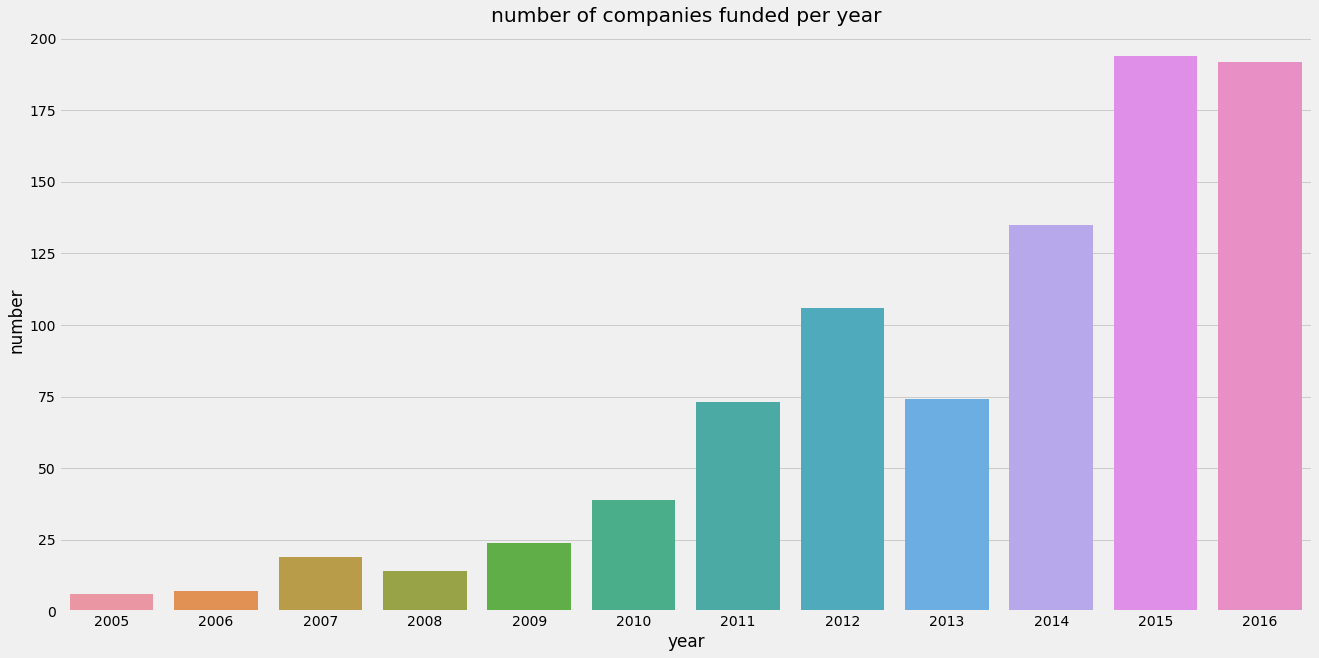

In [135]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax=ax, x = data.year)
plt.title("number of companies funded per year")
plt.ylabel("number")
plt.show()
#in general, an increasing trend is seen  

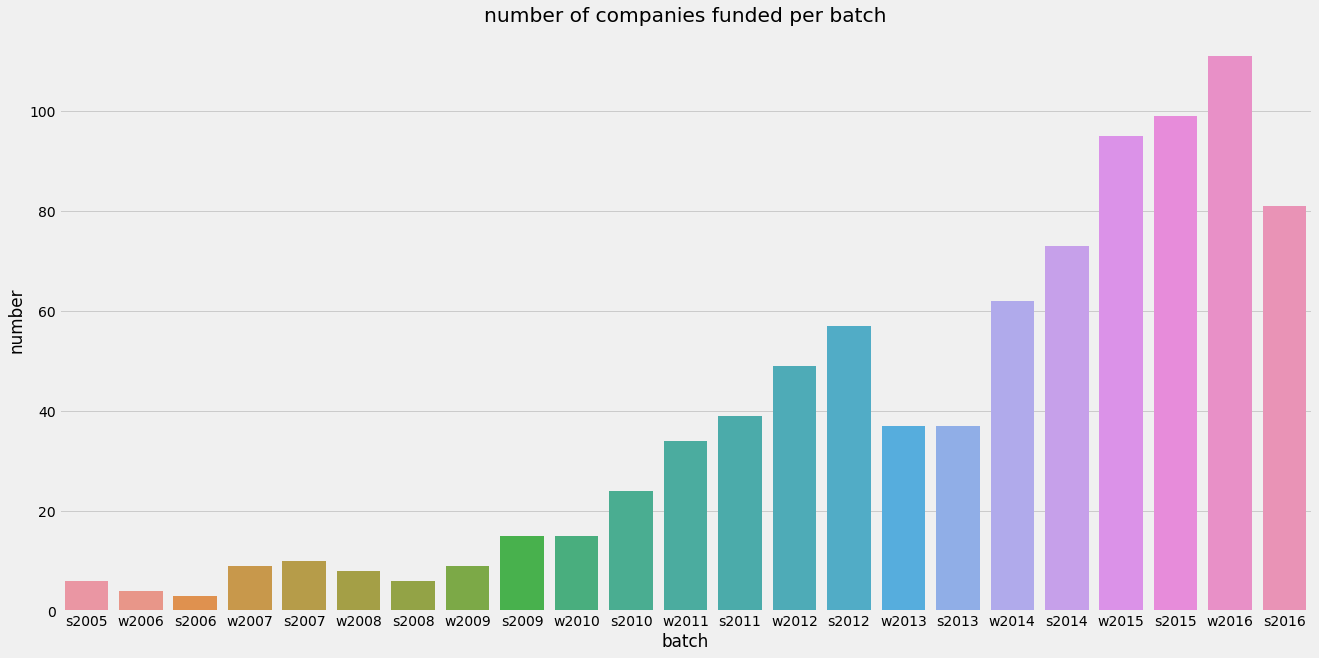

In [136]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax=ax, x = data.batch)
plt.title("number of companies funded per batch")
plt.ylabel("number")
plt.show()
#When being broken down into batches, the trend can be seen more in detail.

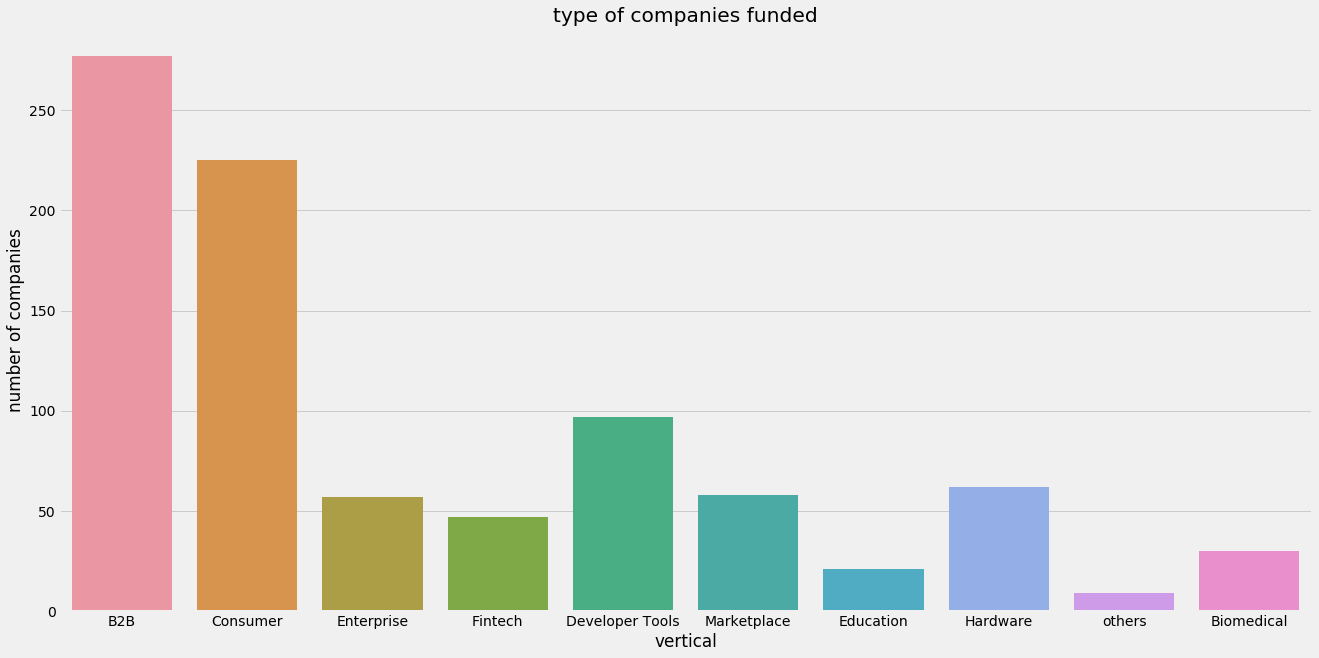

In [137]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax=ax, x = data.vertical)
plt.title("type of companies funded")
plt.ylabel("number of companies")
plt.show()

In [20]:
print("B2B companies form", round((data["vertical"]=="B2B").value_counts()[1]/float(len(data))*100), "% of YC portfolio")

B2B companies form 31.0 % of YC portfolio


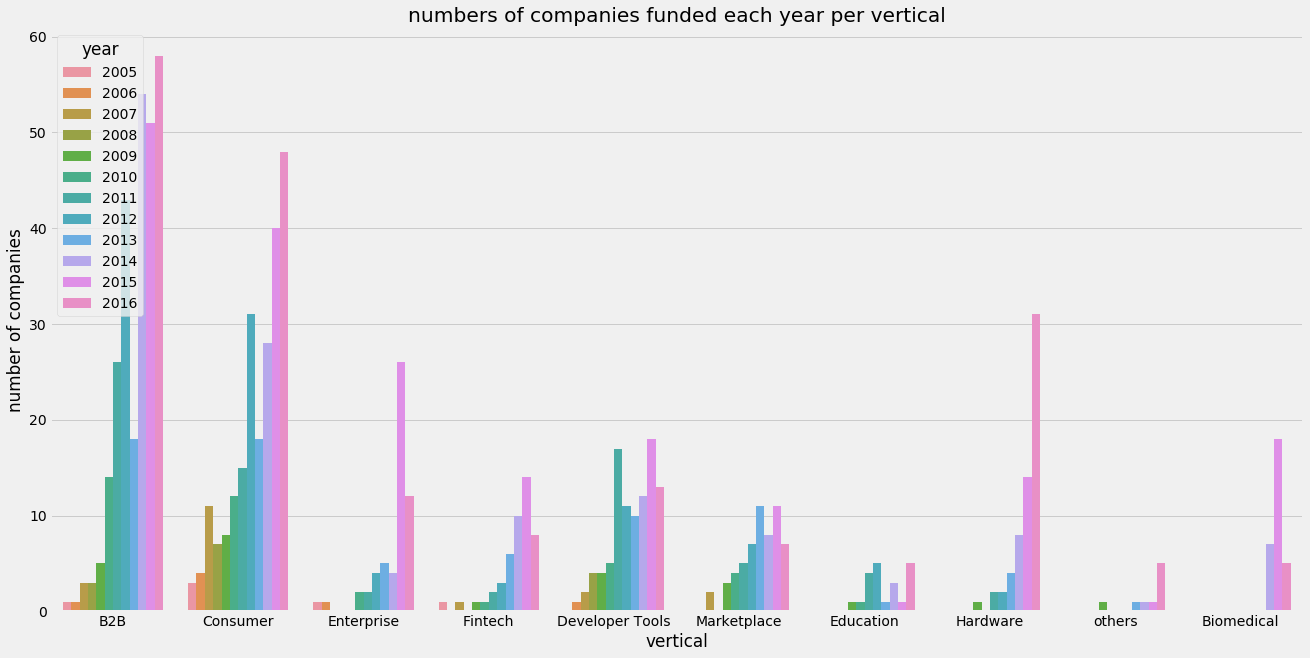

In [139]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data["vertical"], hue=data["year"])
plt.title("numbers of companies funded each year per vertical")
plt.ylabel("number of companies")
plt.show()
#how can I make the hue bar at the right place?

I want to predict the number of B2B companies YC invest in the next year.
The steps should be:
step 1: filter all B2B companies
step 2: define dependent variable & independent variable, the number of B2B companies & year
step 3: use linear regression

In [ ]:
#import tools to run ML
from sklearn import datasets # get a piece of the entire oackage #Scikit-learn, a machine learning library, a huge package
import statistics
from sklearn.linear_model import LinearRegression

In [142]:
#data.loc[:, "vertical"] = data.loc[:, "vertical"].astype("category")
data.vertical

0                  B2B
1             Consumer
2           Enterprise
3             Consumer
4             Consumer
            ...       
878        Marketplace
879                B2B
880           Consumer
881    Developer Tools
882                B2B
Name: vertical, Length: 883, dtype: object

In [ ]:
#
numbers = [1, 2, 3, 4]
B2B = [number for number in numbers if number < 3]
select only numbers less than 3

print(filtered_numbers)

In [ ]:
datnumbers = [1, 2, 3, 4]

def less_than_three(number):
	return number < 3

an_iterator = filter(less_than_three, numbers)
select only numbers less than `3`
filtered_numbers = list(an_iterator)

print(filtered_numbers)

In [141]:
data.count("B2B")

ValueError: No axis named B2B for object type <class 'pandas.core.frame.DataFrame'>

In [143]:
data.count("vertical")

ValueError: No axis named vertical for object type <class 'pandas.core.frame.DataFrame'>

In [ ]:
# Python code to illustrate 
# regression using data set 
#import matplotlib 
#matplotlib.use('GTKAgg') 
#from sklearn import datasets, linear_model 

# Load CSV and columns 
#df = pd.read_csv("Housing.csv") 

Y = data['B2B'] 
X = data['year'] 

X=X.values.reshape(len(X),1) 
Y=Y.values.reshape(len(Y),1) 

# Split the data into training/testing sets 
X_train = X[:-250] 
X_test = X[-250:] 

# Split the targets into training/testing sets 
Y_train = Y[:-250] 
Y_test = Y[-250:] 

# Plot outputs 
plt.scatter(X_test, Y_test, color='black') 
plt.title('Test Data') 
plt.xlabel('Size') 
plt.ylabel('Price') 
plt.xticks(()) 
plt.yticks(()) 


# Create linear regression object 
regr = linear_model.LinearRegression() 

# Train the model using the training sets 
regr.fit(X_train, Y_train) 

# Plot outputs 
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3) 
plt.show() 

